In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import pickle
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv')
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [3]:
df.shape

(32560, 15)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


Observation:
There are total 15 columns. out of which 6 were int64 data type and 9 were having object data type.
one more observation is that , there is no any missing values present in our dataset

# Describe the data:

In [5]:
df.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


Observation: 
1. As looking into 'age' column the distribution is quite good. And the difference between the quantiles is also following same trend here, which is good.
2. looking into 'Fnlwgt' column , we can observe that distribution is good and the difference between quantiles is also same. And the std devation is also less than mean value. so our data distribution is good here.
3. going to observe 'Education_num' column here we can observe that std devaition is less than mean value and difference between the quantiles is also similar, And the also minimun is not equal to 0. that means distribution is good here.
4. we can see here 'Education_num' and 'Capital_loss' columns where data is not distributed well. std deviation is very very high with respect mean, which is not good and also we have observe that min, 25%, 50%, 75% having value 0 and nax is very high. that shows data is highly right skewed here.
5. we have observed in 'Hours_per_week' column data distributution is good.

# checking for null:

In [6]:
df.isna().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

Observation: There is no null values present in our dataset

# EDA

Univariate Analysis:

Let's plot counplot for categorical column:

In [7]:
df['Workclass'].nunique()

9

In [8]:
df['Workclass'].unique()

array([' Self-emp-not-inc', ' Private', ' State-gov', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [9]:
# printing all data type and their unique values
for column in df.columns:
    if df[column].dtype==object:
        print(str(column)+' : ' + str(df[column].unique()))
        print(df[column].value_counts())
        print('============================================')

Workclass : [' Self-emp-not-inc' ' Private' ' State-gov' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked']
 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64
Education : [' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']
 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: Education, dtyp

In [10]:
# Check for '?' in dataset
round((df.isin([' ?']).sum() / df.shape[0])
      * 100, 2).astype(str) + ' %'

Age                0.0 %
Workclass         5.64 %
Fnlwgt             0.0 %
Education          0.0 %
Education_num      0.0 %
Marital_status     0.0 %
Occupation        5.66 %
Relationship       0.0 %
Race               0.0 %
Sex                0.0 %
Capital_gain       0.0 %
Capital_loss       0.0 %
Hours_per_week     0.0 %
Native_country    1.79 %
Income             0.0 %
dtype: object

Observation: 

1. There is no null value in data

2. The dataset doesn't have any null values, but it contains missing values in the form of '?' which needs to be preprocessed.



In [11]:
df= df.replace(' ?', np.nan)

In [12]:
df.isnull().sum()

Age                  0
Workclass         1836
Fnlwgt               0
Education            0
Education_num        0
Marital_status       0
Occupation        1843
Relationship         0
Race                 0
Sex                  0
Capital_gain         0
Capital_loss         0
Hours_per_week       0
Native_country     583
Income               0
dtype: int64

In [13]:
# filling the missing values
columns_with_nan = ['Workclass', 'Occupation', 'Native_country']

In [14]:
# filling null values with mode values
for col in columns_with_nan:
    df[col].fillna(df[col].mode()[0], inplace=True)

In [15]:
# Check for '?' in dataset
round((df.isin([' ?']).sum() / df.shape[0])
      * 100, 2).astype(str) + ' %'

Age               0.0 %
Workclass         0.0 %
Fnlwgt            0.0 %
Education         0.0 %
Education_num     0.0 %
Marital_status    0.0 %
Occupation        0.0 %
Relationship      0.0 %
Race              0.0 %
Sex               0.0 %
Capital_gain      0.0 %
Capital_loss      0.0 %
Hours_per_week    0.0 %
Native_country    0.0 %
Income            0.0 %
dtype: object

 <=50K    75.92 %
 >50K     24.08 %
Name: Income, dtype: object


<AxesSubplot:xlabel='Income', ylabel='count'>

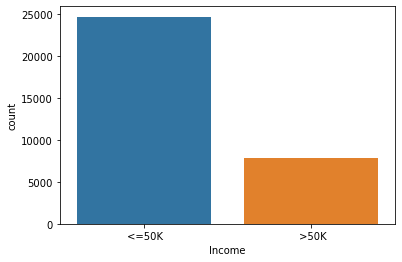

In [16]:
# Checking the counts of label categories
income = df['Income'].value_counts(normalize=True)
print(round(income * 100, 2).astype('str') + ' %')
sns.countplot(df['Income'])

Observation: Data is imbalance we have to deal with it

# Plotting heatmap:

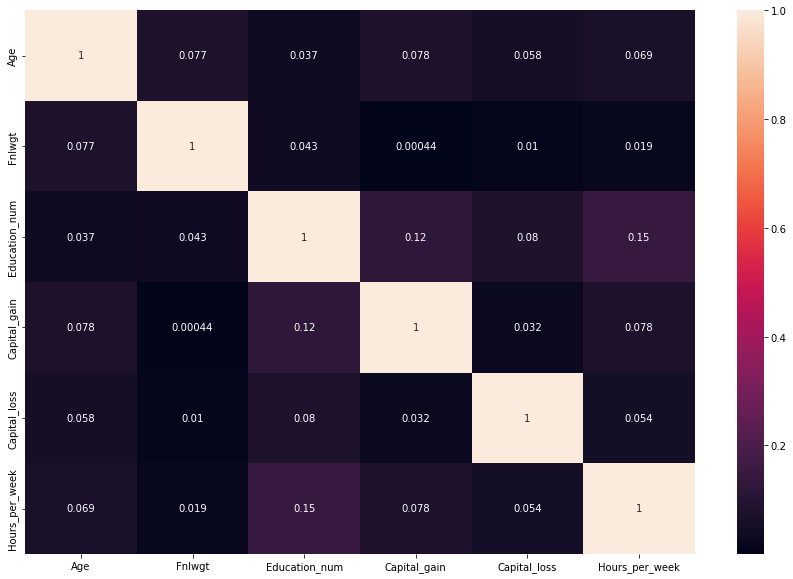

In [17]:
df_corr=df.corr().abs()

plt.figure(figsize=(15,10))
sns.heatmap(df_corr,annot=True,annot_kws={'size':10})
plt.show()

Observation: we have observed here , there is no any such columns who's having strong relationship with target variable, As well as there is no multicollinearity problem exist here,

In [18]:
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


# Bivariate Analysis:

<AxesSubplot:xlabel='Age', ylabel='count'>

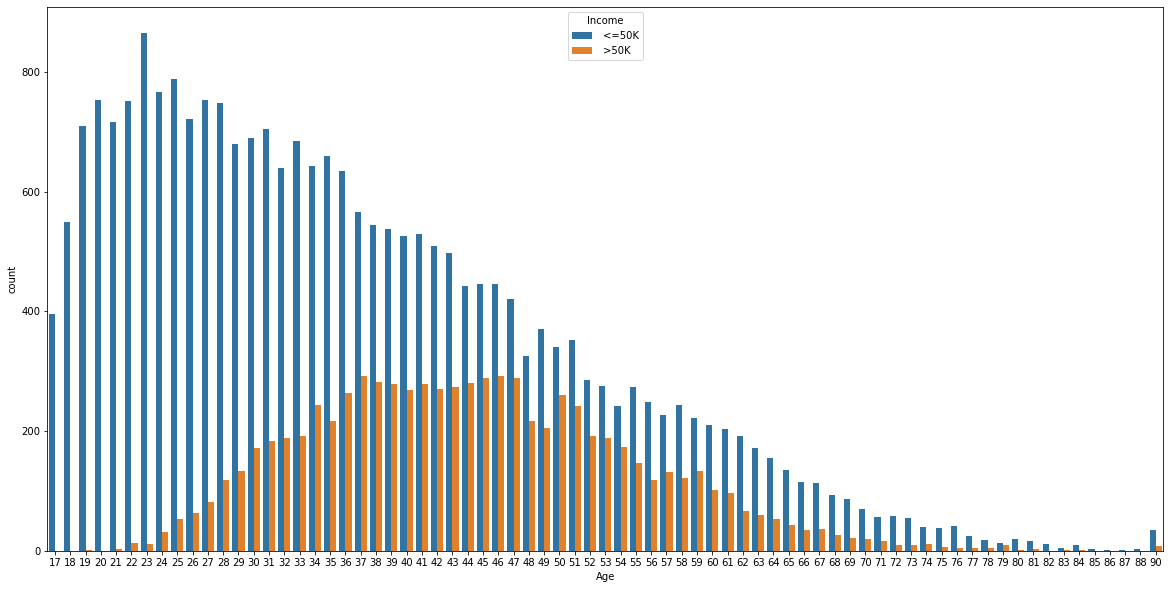

In [19]:
plt.figure(figsize=(20,10))
sns.countplot(x='Age',hue='Income',data=df)

 Observation: We can notice here in age of 17 to 30 most of people having less than 50k of income and after when in increasing age we see in category of more then 50k no of people are increasing.
 And after age 60 we can see here, there is very less no. in greater than 50k

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, ' Husband'),
  Text(1, 0, ' Not-in-family'),
  Text(2, 0, ' Wife'),
  Text(3, 0, ' Own-child'),
  Text(4, 0, ' Unmarried'),
  Text(5, 0, ' Other-relative')])

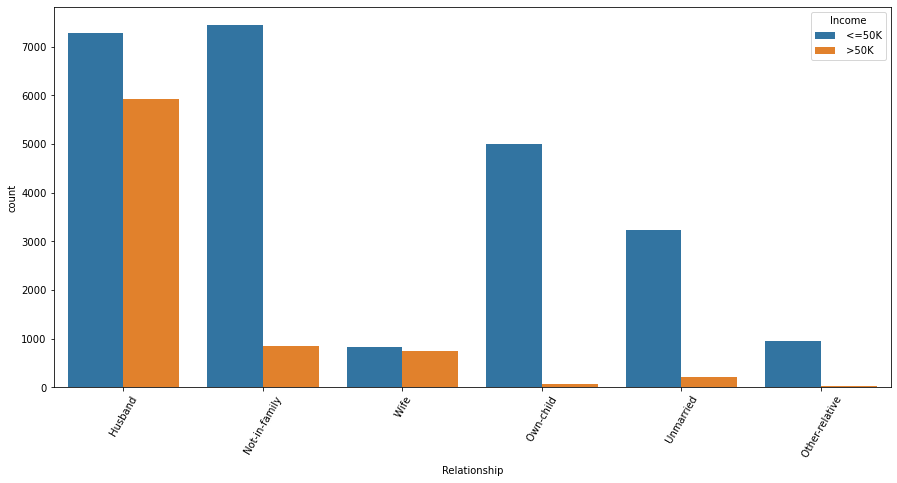

In [20]:
plt.figure(figsize=(15,7))
sns.countplot(x='Relationship',hue='Income',data=df)
plt.xticks(rotation=60)

Observation: 

 1.   Only in Husband we see we have almost 6000 people having more than 50k income
 2.  In wife we also see income is almost in both category
 3.   all in other ralation we have most of people less than 50k income



(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, ' Married-civ-spouse'),
  Text(1, 0, ' Divorced'),
  Text(2, 0, ' Married-spouse-absent'),
  Text(3, 0, ' Never-married'),
  Text(4, 0, ' Separated'),
  Text(5, 0, ' Married-AF-spouse'),
  Text(6, 0, ' Widowed')])

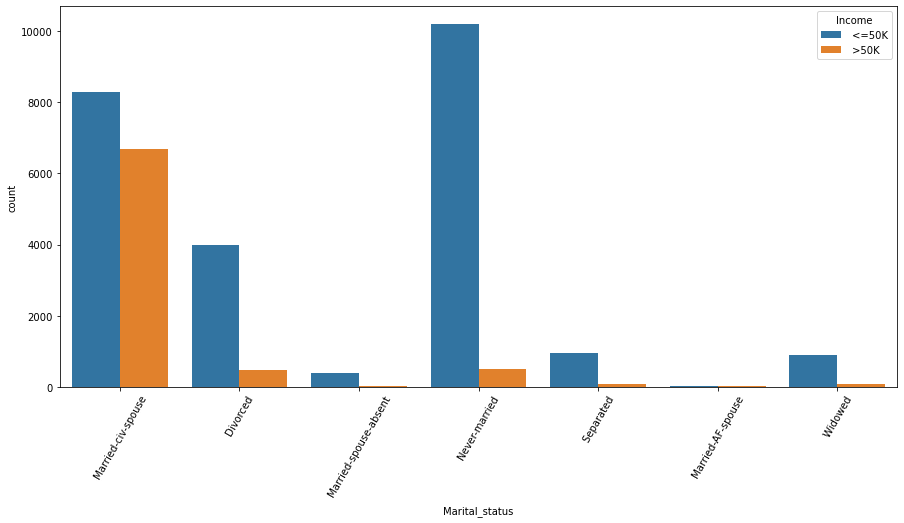

In [21]:
plt.figure(figsize=(15,7))
sns.countplot(x='Marital_status',hue='Income',data=df)
plt.xticks(rotation=60)

Observation: In Marital_status

1. In category of more than 50k income we have more person those are Married-civ-spouse
2. In other Marital_status only few of them we have those having more than 50k of income most of them are less then 50k of income


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '3'),
  Text(3, 0, '4'),
  Text(4, 0, '5'),
  Text(5, 0, '6'),
  Text(6, 0, '7'),
  Text(7, 0, '8'),
  Text(8, 0, '9'),
  Text(9, 0, '10'),
  Text(10, 0, '11'),
  Text(11, 0, '12'),
  Text(12, 0, '13'),
  Text(13, 0, '14'),
  Text(14, 0, '15'),
  Text(15, 0, '16')])

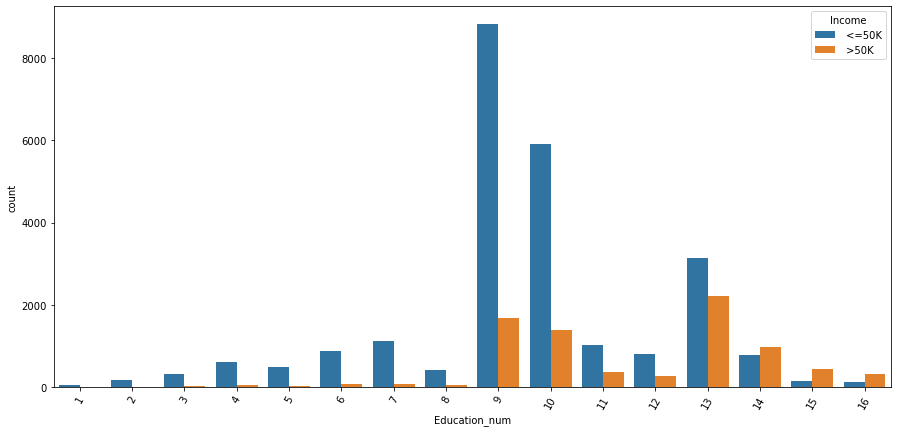

In [22]:
plt.figure(figsize=(15,7))
sns.countplot(x='Education_num',hue='Income',data=df)
plt.xticks(rotation=60)

Observation: We can notice here

 when education_num is increasing we have people increasing in categories of income more than 50k


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, ' Bachelors'),
  Text(1, 0, ' HS-grad'),
  Text(2, 0, ' 11th'),
  Text(3, 0, ' Masters'),
  Text(4, 0, ' 9th'),
  Text(5, 0, ' Some-college'),
  Text(6, 0, ' Assoc-acdm'),
  Text(7, 0, ' Assoc-voc'),
  Text(8, 0, ' 7th-8th'),
  Text(9, 0, ' Doctorate'),
  Text(10, 0, ' Prof-school'),
  Text(11, 0, ' 5th-6th'),
  Text(12, 0, ' 10th'),
  Text(13, 0, ' 1st-4th'),
  Text(14, 0, ' Preschool'),
  Text(15, 0, ' 12th')])

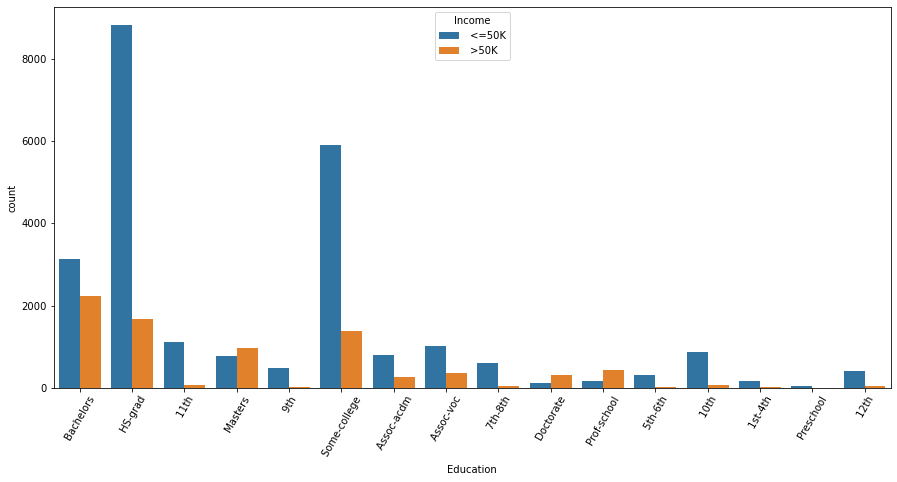

In [23]:
plt.figure(figsize=(15,7))
sns.countplot(x='Education',hue='Income',data=df)
plt.xticks(rotation=60)

Observation: 
Education also having high impact on income

1.people those having bechelors, most of them having less than 50k but we more people there having more than 50k comparing other eduction holders
2.In HS-grad most of people having less than 50k
3.In 11th education on few of them having more than 50k
4.In Master Education we more people in income categ. more than 50k
5.In Doctorate and Prof-school most of people haing more than 50k and in all other rest most of people haing less than 50k


(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, ' Self-emp-not-inc'),
  Text(1, 0, ' Private'),
  Text(2, 0, ' State-gov'),
  Text(3, 0, ' Federal-gov'),
  Text(4, 0, ' Local-gov'),
  Text(5, 0, ' Self-emp-inc'),
  Text(6, 0, ' Without-pay'),
  Text(7, 0, ' Never-worked')])

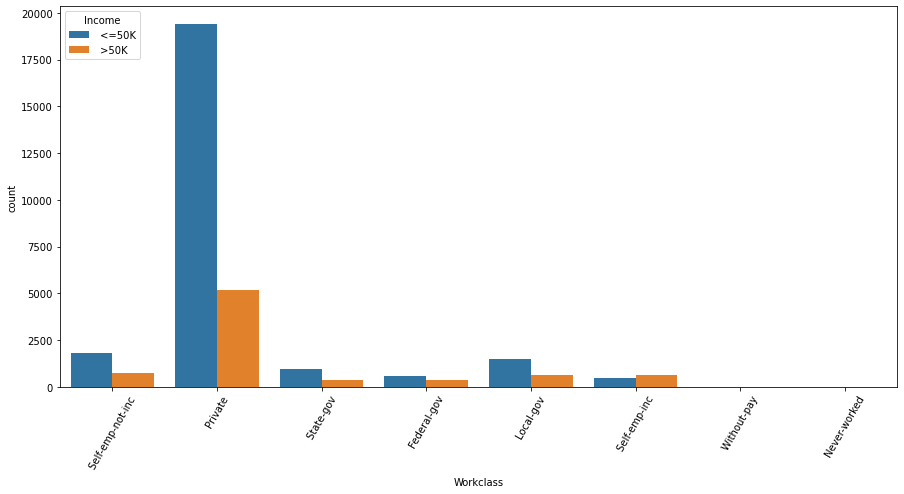

In [24]:
plt.figure(figsize=(15,7))
sns.countplot(x='Workclass',hue='Income',data=df)
plt.xticks(rotation=60)

Observation:
In Workclass

- Self-eml-not-inc mostly people haivng less than 50k income 
- In Private workclass most of the people having less than 50k income
- In state-gov also most people having less than 50k
- In Fedral-gov the is very little diffrence
- In local-gov most of people having less than 50k 
- In Self-emp-inc we have more people in more than 50k 
- Some of people we in Without-pay and Never-worked

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, ' Exec-managerial'),
  Text(1, 0, ' Handlers-cleaners'),
  Text(2, 0, ' Prof-specialty'),
  Text(3, 0, ' Other-service'),
  Text(4, 0, ' Adm-clerical'),
  Text(5, 0, ' Sales'),
  Text(6, 0, ' Craft-repair'),
  Text(7, 0, ' Transport-moving'),
  Text(8, 0, ' Farming-fishing'),
  Text(9, 0, ' Machine-op-inspct'),
  Text(10, 0, ' Tech-support'),
  Text(11, 0, ' Protective-serv'),
  Text(12, 0, ' Armed-Forces'),
  Text(13, 0, ' Priv-house-serv')])

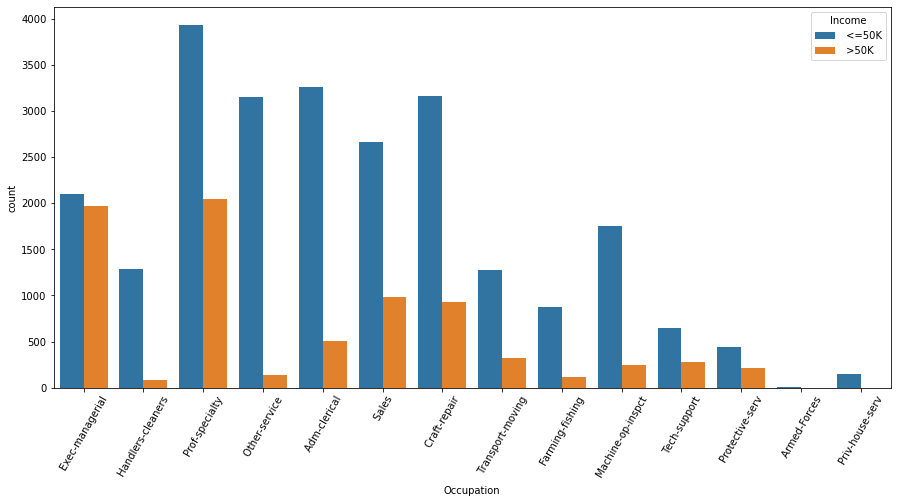

In [25]:
plt.figure(figsize=(15,7))
sns.countplot(x='Occupation',hue='Income',data=df)
plt.xticks(rotation=60)

Observation: In Occupation :

1.There is very little diffrence in Exec-managerial occupation, The people who is having income less than 50k and more than 50k, they both are almost same
2.In Handlers-cleaners maximum people of income is less than 50k, there are very few people those having more than 50k income
3.In Prof-specialty having aournd 4000 people less than 50k income, around 2000 having more than 50k income
4.In Other-service most of the people haivng less than 50k of income
5.In Adm-clerical occupation around 3200 having less than 50k income, only around 500 haing more than 50k income
6.In Sales as well more than 2500 having less than 50k income and around 1000 having more than 50k income
7.In Craft-repair more than 3000 people we have in less than 50k income of category and around 900 haing more than 50k of income
8.In Transport-moving around 1300 people having less than 50k of income and 250 people haing more than 50k of income
9.In Farming-fishing most of the people haing less than 50k of income
10.In Machine-op-inspct also having most of the people less than 50k of income
11.In Tech-support occupation aslo haing most of people less than 50k income
12.Protective-serv we have data but there are also most of people having less than 50k
13.In Armed-Forcs and Piv-house-serv there is no person who is having more than 50k of income

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40]),
 [Text(0, 0, ' United-States'),
  Text(1, 0, ' Cuba'),
  Text(2, 0, ' Jamaica'),
  Text(3, 0, ' India'),
  Text(4, 0, ' Mexico'),
  Text(5, 0, ' South'),
  Text(6, 0, ' Puerto-Rico'),
  Text(7, 0, ' Honduras'),
  Text(8, 0, ' England'),
  Text(9, 0, ' Canada'),
  Text(10, 0, ' Germany'),
  Text(11, 0, ' Iran'),
  Text(12, 0, ' Philippines'),
  Text(13, 0, ' Italy'),
  Text(14, 0, ' Poland'),
  Text(15, 0, ' Columbia'),
  Text(16, 0, ' Cambodia'),
  Text(17, 0, ' Thailand'),
  Text(18, 0, ' Ecuador'),
  Text(19, 0, ' Laos'),
  Text(20, 0, ' Taiwan'),
  Text(21, 0, ' Haiti'),
  Text(22, 0, ' Portugal'),
  Text(23, 0, ' Dominican-Republic'),
  Text(24, 0, ' El-Salvador'),
  Text(25, 0, ' France'),
  Text(26, 0, ' Guatemala'),
  Text(27, 0, ' China'),
  Text(28, 0, ' Japan'),
  Text(29, 0, ' Yugoslavia'

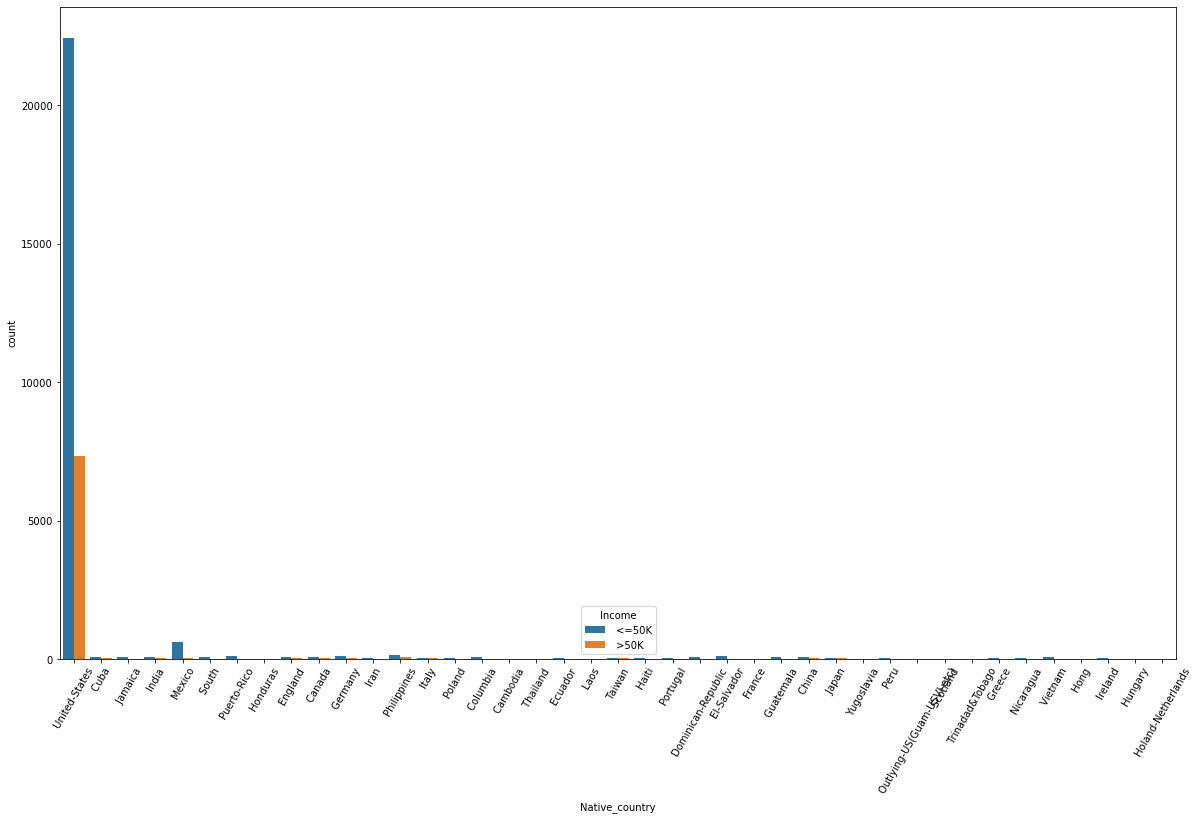

In [26]:
plt.figure(figsize=(20,12))
sns.countplot(x='Native_country',hue='Income',data=df)
plt.xticks(rotation=60)

Observation: Here we have most of data USA people there most of people earing less then 50k

# In EDA we see in all of columns we see most of people are earning less then 50k that could be possible becuase we have less data for people income more than 50k

# Using LabelEncoder for convering categorical to numerical

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [28]:
categ_columns=['Workclass','Education','Marital_status','Occupation','Ralationship','Race','Sex','Native_country','Income']

In [29]:
from sklearn.preprocessing import LabelEncoder

In [30]:
for col in df.columns:
    if df[col].dtypes == 'object':
        encoder = LabelEncoder()
        df[col] = encoder.fit_transform(df[col])

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Age             32560 non-null  int64
 1   Workclass       32560 non-null  int32
 2   Fnlwgt          32560 non-null  int64
 3   Education       32560 non-null  int32
 4   Education_num   32560 non-null  int64
 5   Marital_status  32560 non-null  int32
 6   Occupation      32560 non-null  int32
 7   Relationship    32560 non-null  int32
 8   Race            32560 non-null  int32
 9   Sex             32560 non-null  int32
 10  Capital_gain    32560 non-null  int64
 11  Capital_loss    32560 non-null  int64
 12  Hours_per_week  32560 non-null  int64
 13  Native_country  32560 non-null  int32
 14  Income          32560 non-null  int32
dtypes: int32(9), int64(6)
memory usage: 2.6 MB


Observation: All columns are converted into numerical now

In [32]:
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,5,83311,9,13,2,3,0,4,1,0,0,13,38,0
1,38,3,215646,11,9,0,5,1,4,1,0,0,40,38,0
2,53,3,234721,1,7,2,5,0,2,1,0,0,40,38,0
3,28,3,338409,9,13,2,9,5,2,0,0,0,40,4,0
4,37,3,284582,12,14,2,3,5,4,0,0,0,40,38,0


# Skewness handling

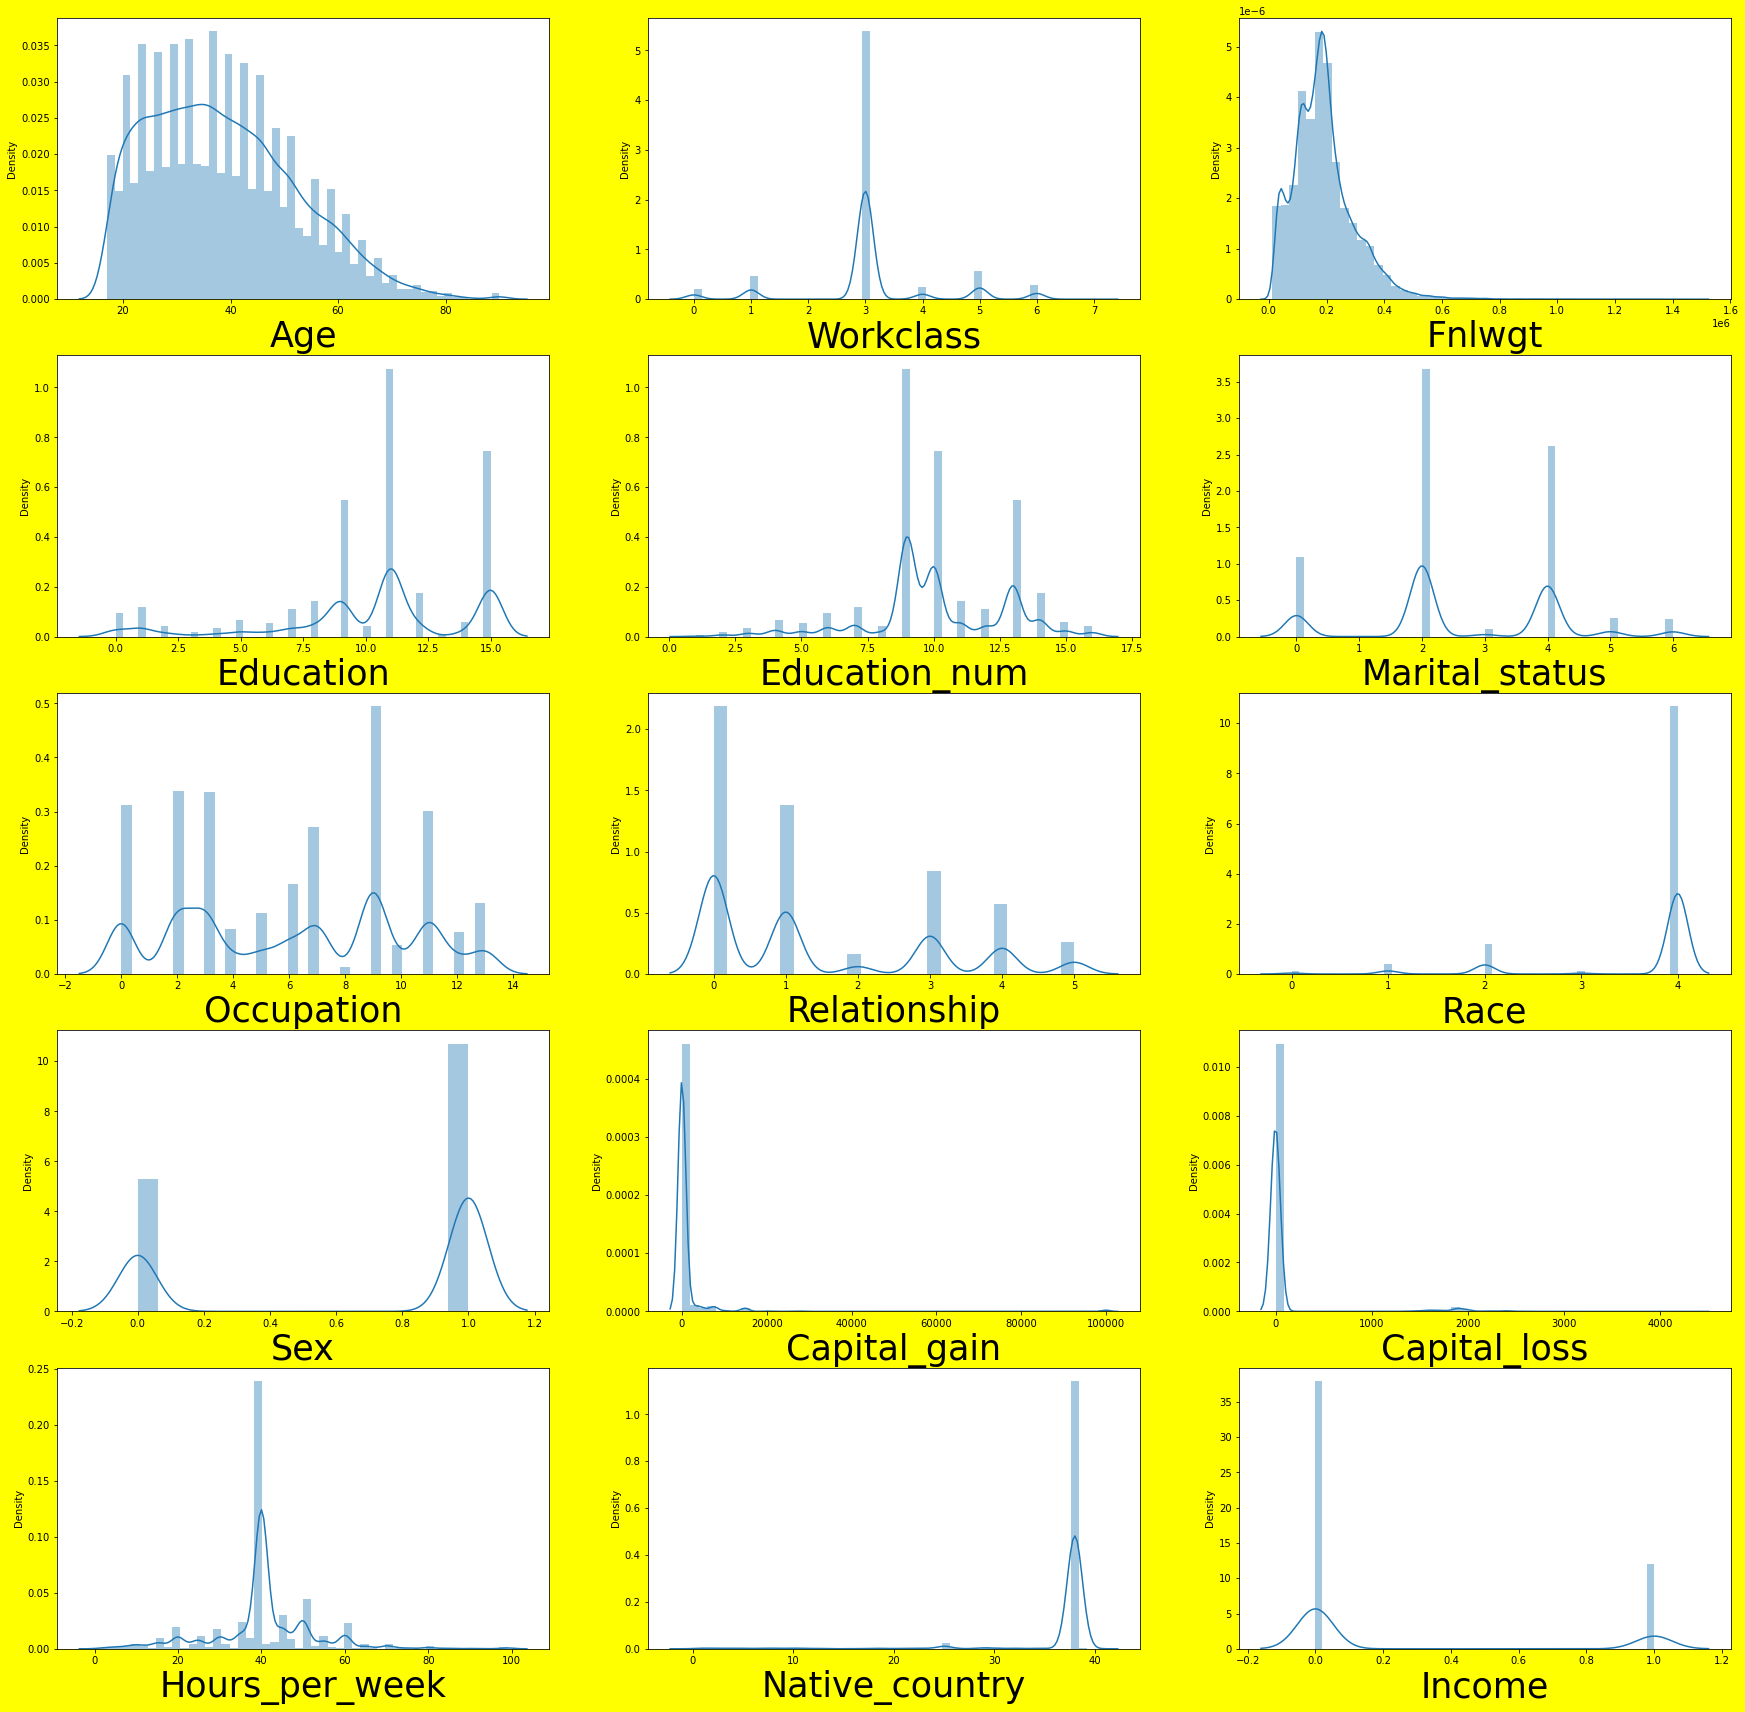

In [33]:
plt.figure(figsize=(30,30),facecolor='yellow')
plotnumber=1

for column in df:
    if plotnumber<=15:
        ax=plt.subplot(5,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=35)
        
        plotnumber+=1
plt.show()

In [34]:
df.skew()

Age                0.558738
Workclass          0.076178
Fnlwgt             1.446972
Education         -0.934063
Education_num     -0.311630
Marital_status    -0.013448
Occupation         0.000536
Relationship       0.786784
Race              -2.435332
Sex               -0.719244
Capital_gain      11.953690
Capital_loss       4.594549
Hours_per_week     0.227636
Native_country    -4.243083
Income             1.212383
dtype: float64

# skewness more than+/- 0.5 will we treated


# object and Income columns will not be treated

Observation: we can see here most of the columns are skewed
will only deal with numercal columns

    Age
    Fnlwgt
    Capital_gain
    Capital_loss


In [35]:
from sklearn.preprocessing import power_transform

In [36]:
df[['Age','Fnlwgt','Capital_gain','Capital_loss']]=power_transform(df[['Age','Fnlwgt','Capital_gain','Capital_loss']])

In [37]:
df.skew()

Age              -0.013897
Workclass         0.076178
Fnlwgt            0.016914
Education        -0.934063
Education_num    -0.311630
Marital_status   -0.013448
Occupation        0.000536
Relationship      0.786784
Race             -2.435332
Sex              -0.719244
Capital_gain      3.016951
Capital_loss      4.299511
Hours_per_week    0.227636
Native_country   -4.243083
Income            1.212383
dtype: float64

Observation: we have successfully removed the skewness from continuous columns

# Checking Outliers:

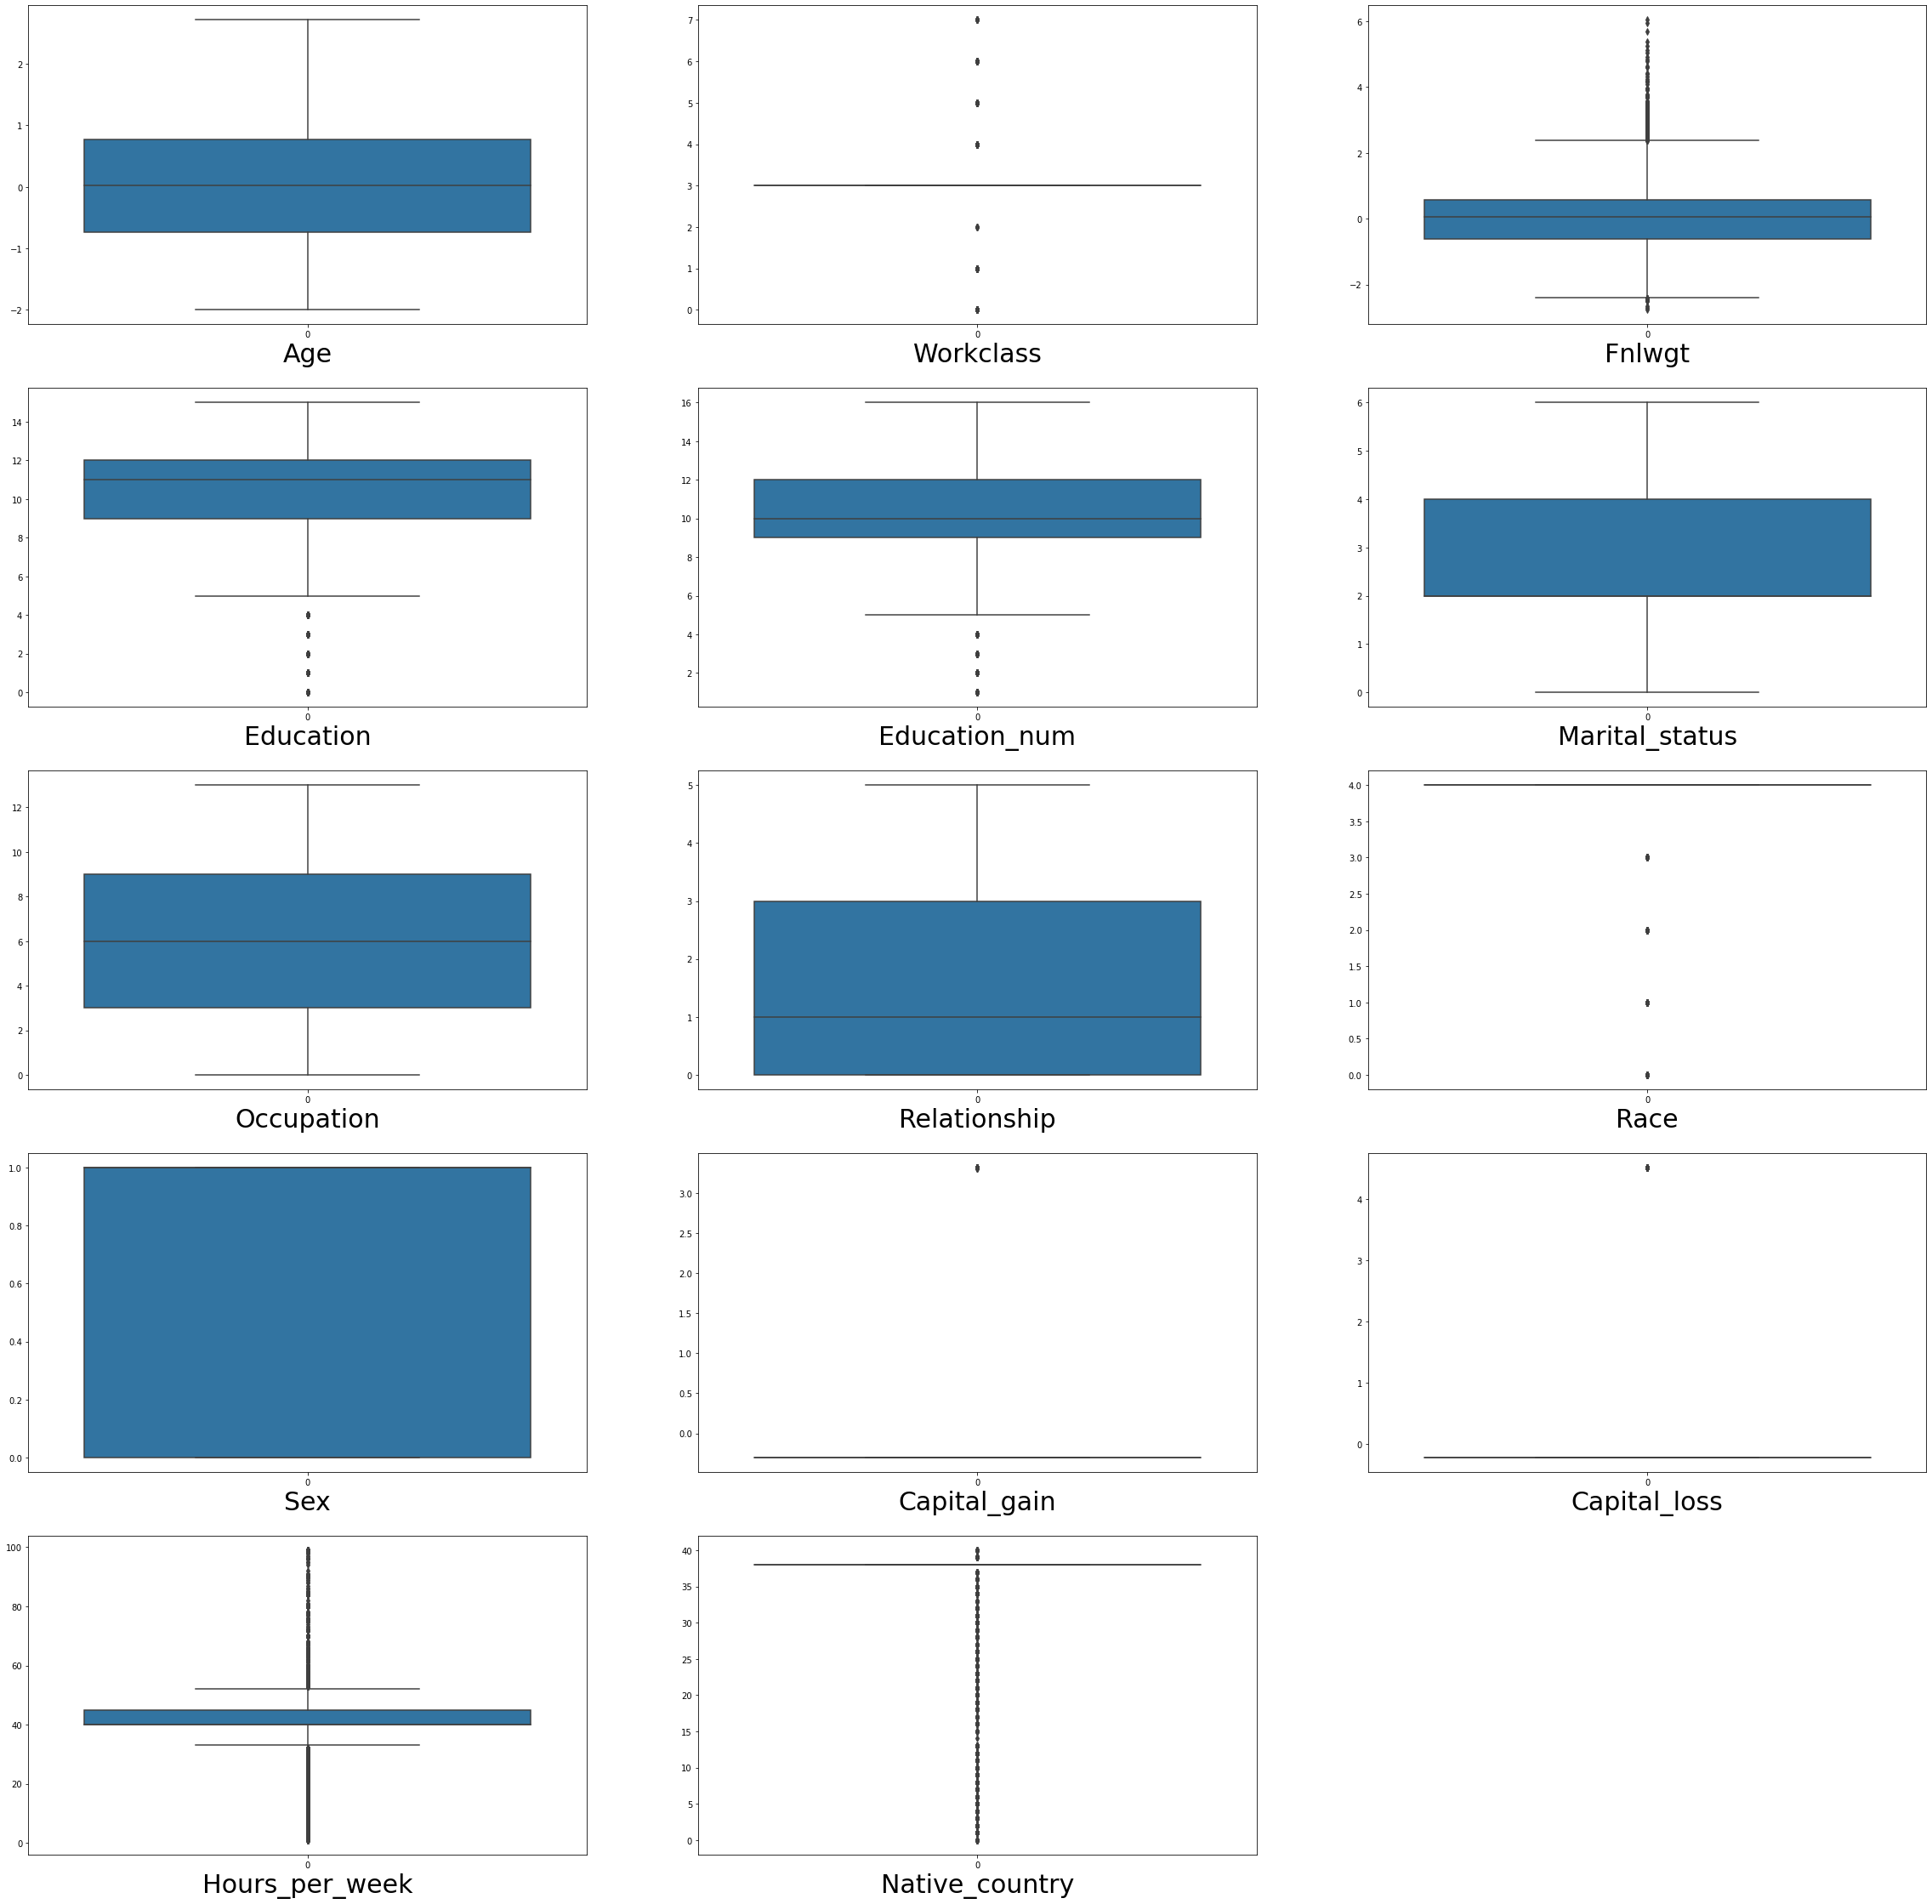

In [38]:
plt.figure(figsize=(40,40))
plotnumber=1

for column in df:
    if plotnumber<15:
        plt.subplot(5,3,plotnumber)
        ax=sns.boxplot(data=df[column])
        plt.xlabel(column,fontsize=30)
        
        plotnumber+=1
plt.show()

# Outliers handling:

ZSCORE-METHOD

In [39]:
from scipy.stats import zscore

z=np.abs(zscore(df))

print(np.where(z>3))

(array([    3,     7,     8, ..., 32550, 32552, 32559], dtype=int64), array([13, 10, 10, ...,  8,  8, 10], dtype=int64))


In [40]:
df_1=df[(z<3).all(axis=1)]
print("with outliers::",df.shape)
print("After removing outliers::",df_1.shape)

with outliers:: (32560, 15)
After removing outliers:: (25750, 15)


# IQR:

In [41]:
from scipy import stats 
IQR = stats.iqr(df) 
IQR

9.0

In [42]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
df_out = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
print(df_out.shape)

(24847, 15)


Observation: choosing ZSCORE because there is huge dataloss in IQR

In [43]:
df=df_1

In [44]:
df.shape

(25750, 15)

# Checking for duplicates:

In [45]:
#Checking and removing if there is any Duplicate entry present in our dataset
df.drop_duplicates(inplace=True)
df.shape

(25730, 15)

# Dividing data into X and Y

In [46]:
x=df.drop(['Income'],axis=1)
y=df['Income']

In [47]:
x.shape

(25730, 14)

In [48]:
y.shape

(25730,)

# scaling X values

In [49]:
from sklearn.preprocessing import MinMaxScaler

sc=MinMaxScaler()
x=sc.fit_transform(x)

In [50]:
pd.DataFrame(x).isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
dtype: int64

In [51]:
pd.DataFrame(x).describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
count,25730.000000,25730.000000,25730.000000,25730.000000,25730.000000,25730.000000,25730.000000,25730.000000,25730.000000,25730.000000,25730.0,25730.0,25730.000000,25730.000000
mean,0.411036,0.514134,0.455072,0.687410,0.537311,0.441346,0.468857,0.300303,0.891644,0.655033,0.0,0.0,0.488363,0.881787
std,0.213555,0.182184,0.178165,0.261721,0.184640,0.255983,0.307540,0.319324,0.307788,0.475367,0.0,0.0,0.153145,0.118742
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000
25%,0.248293,0.500000,0.345165,0.600000,0.461538,0.333333,0.153846,0.000000,1.000000,0.000000,0.0,0.0,0.479452,0.904762
50%,0.413877,0.500000,0.467108,0.733333,0.538462,0.333333,0.461538,0.200000,1.000000,1.000000,0.0,0.0,0.493151,0.904762
75%,0.575094,0.500000,0.560132,0.800000,0.692308,0.666667,0.692308,0.600000,1.000000,1.000000,0.0,0.0,0.561644,0.904762
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,0.0,1.000000,1.000000


Observation: Data has been scaled

# Imbalanced learn:

Using OverSamling_BorderlineSMOTE

-because there is less data in attrition for yes


<AxesSubplot:xlabel='Income', ylabel='count'>

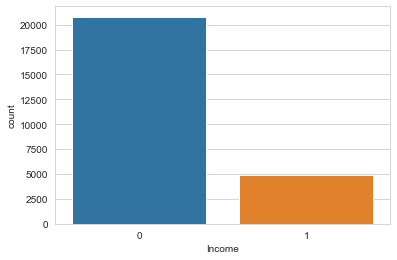

In [52]:
sns.set_style("whitegrid")
sns.countplot(x="Income", data=df)

Observation: 


1.We can see here Data is not fully balance but we'll treat the imbalace.
2.we have around 5000 in yes and around 25000 in no.



In [53]:
from imblearn.over_sampling import BorderlineSMOTE

In [54]:
x_rus, y_rus =BorderlineSMOTE().fit_resample(x, y)
print('original  Target dataset shape:',y.shape)
print('Resample Target dataset shape',y_rus.shape)

original  Target dataset shape: (25730,)
Resample Target dataset shape (41606,)


In [55]:
x.shape

(25730, 14)

In [56]:
x_rus.shape

(41606, 14)

# Spliting Train and Test data

In [57]:
from sklearn.model_selection import train_test_split

In [58]:
from sklearn.metrics import confusion_matrix,classification_report,roc_curve,roc_auc_score,accuracy_score

In [59]:
from sklearn.linear_model import LogisticRegression

LR=LogisticRegression()

for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x_rus,y_rus,test_size=0.25,random_state=i)
    LR.fit(x_train,y_train)
    LR_predict_test=LR.predict(x_test)
    print(f'At random state {i}, The training accuracy is:-{LR.score(x_train,y_train)}')
    print(f'At random state {i}, The test accuracy is:-{accuracy_score(y_test,LR_predict_test)}')

At random state 0, The training accuracy is:-0.7418600179464171
At random state 0, The test accuracy is:-0.7432224572197654
At random state 1, The training accuracy is:-0.7429175746699141
At random state 1, The test accuracy is:-0.7421649682753316
At random state 2, The training accuracy is:-0.7434623766183822
At random state 2, The test accuracy is:-0.7408190732551433
At random state 3, The training accuracy is:-0.7402256121010127
At random state 3, The test accuracy is:-0.7465871947702365
At random state 4, The training accuracy is:-0.7407704140494809
At random state 4, The test accuracy is:-0.7470678715631609
At random state 5, The training accuracy is:-0.7417959235995385
At random state 5, The test accuracy is:-0.7402422611036339
At random state 6, The training accuracy is:-0.7426611972823997
At random state 6, The test accuracy is:-0.7422611036339165
At random state 7, The training accuracy is:-0.7452570183309832
At random state 7, The test accuracy is:-0.7331282445683522
At rando

Observation: At random state 68 giving highest accuracy of 0.75. so we are choosing that as random state

# splitting the data:

In [60]:
x_train,x_test,y_train,y_test=train_test_split(x_rus,y_rus,test_size=0.25,random_state=68)

In [61]:
x_train.shape

(31204, 14)

In [62]:
y_train.shape

(31204,)

In [63]:
x_test.shape

(10402, 14)

In [64]:
y_test.shape

(10402,)

# Model Building:

# Logistic Regression:

In [65]:
from sklearn.linear_model import LogisticRegression

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV,cross_val_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [66]:
logreg=LogisticRegression()
logreg_score=cross_val_score(logreg,x_rus,y_rus,cv=5,scoring='accuracy')
print("cross validation score:",np.mean(logreg_score))

cross validation score: 0.7418159293923716


In [67]:
logreg.fit(x_train,y_train)
LR_predicted=logreg.predict(x_test)

print(accuracy_score(y_test,LR_predicted))
print(confusion_matrix(y_test,LR_predicted))
print(classification_report(y_test,LR_predicted))
print("Training accuracy::",logreg.score(x_train,y_train))
print("Test accuracy::",logreg.score(x_test,y_test))

0.7445683522399539
[[3635 1567]
 [1090 4110]]
              precision    recall  f1-score   support

           0       0.77      0.70      0.73      5202
           1       0.72      0.79      0.76      5200

    accuracy                           0.74     10402
   macro avg       0.75      0.74      0.74     10402
weighted avg       0.75      0.74      0.74     10402

Training accuracy:: 0.7411229329573131
Test accuracy:: 0.7445683522399539


# DECISION TREE CLASSIFIER

In [68]:
dtc=DecisionTreeClassifier()
dtc_score=cross_val_score(dtc,x_rus,y_rus,cv=5,scoring='accuracy')
print("cross validation score for svm:",np.mean(dtc_score))

cross validation score for svm: 0.8422624301558231


In [69]:
dtc.fit(x_train,y_train)
predicted_dtc=dtc.predict(x_test)
print(accuracy_score(y_test,predicted_dtc))
print(confusion_matrix(y_test,predicted_dtc))
print(classification_report(y_test,predicted_dtc))
print("Training accuracy::",dtc.score(x_train,y_train))
print("Test accuracy::",dtc.score(x_test,y_test))

0.8589694289559701
[[4424  778]
 [ 689 4511]]
              precision    recall  f1-score   support

           0       0.87      0.85      0.86      5202
           1       0.85      0.87      0.86      5200

    accuracy                           0.86     10402
   macro avg       0.86      0.86      0.86     10402
weighted avg       0.86      0.86      0.86     10402

Training accuracy:: 0.9999679528265607
Test accuracy:: 0.8589694289559701


# KNeighborsClassifier:

In [70]:
knn=KNeighborsClassifier()
knn_score=cross_val_score(knn,x_rus,y_rus,cv=5,scoring='accuracy')
print("cross validation score for knn:",np.mean(knn_score))

cross validation score for knn: 0.8625687314991147


In [71]:
knn.fit(x_train,y_train)
predicted_knn=knn.predict(x_test)
print(accuracy_score(y_test,predicted_knn))
print(confusion_matrix(y_test,predicted_knn))
print(classification_report(y_test,predicted_knn))
print("Training accuracy::",knn.score(x_train,y_train))
print("Test accuracy::",knn.score(x_test,y_test))

0.8667563930013459
[[3963 1239]
 [ 147 5053]]
              precision    recall  f1-score   support

           0       0.96      0.76      0.85      5202
           1       0.80      0.97      0.88      5200

    accuracy                           0.87     10402
   macro avg       0.88      0.87      0.87     10402
weighted avg       0.88      0.87      0.87     10402

Training accuracy:: 0.8939238559159082
Test accuracy:: 0.8667563930013459


# RandomForestClassifier:

In [72]:
rfc=RandomForestClassifier()
rfc_score=cross_val_score(rfc,x_rus,y_rus,cv=5,scoring='accuracy')
print("cross validation score for rfc:",np.mean(rfc_score))

cross validation score for rfc: 0.8920374728498682


In [73]:
rfc.fit(x_train,y_train)
predicted_rfc=rfc.predict(x_test)
print(accuracy_score(y_test,predicted_rfc))
print(confusion_matrix(y_test,predicted_rfc))
print(classification_report(y_test,predicted_rfc))
print("Training accuracy::",rfc.score(x_train,y_train))
print("Test accuracy::",rfc.score(x_test,y_test))

0.9048259950009614
[[4535  667]
 [ 323 4877]]
              precision    recall  f1-score   support

           0       0.93      0.87      0.90      5202
           1       0.88      0.94      0.91      5200

    accuracy                           0.90     10402
   macro avg       0.91      0.90      0.90     10402
weighted avg       0.91      0.90      0.90     10402

Training accuracy:: 0.9999359056531214
Test accuracy:: 0.9048259950009614


# ENSEMBLE TECHNIQUES

# 1.ADA BOOST CLASSIFIER

In [74]:
adb=AdaBoostClassifier()
adb_score=cross_val_score(adb,x_rus,y_rus,cv=10,scoring='accuracy')
print("cross validation score for Ada boost:",np.mean(adb_score))

cross validation score for Ada boost: 0.8342558129055515


In [75]:
adb.fit(x_train,y_train)
predicted_adb=adb.predict(x_test)
print(accuracy_score(y_test,predicted_adb))
print(confusion_matrix(y_test,predicted_adb))
print(classification_report(y_test,predicted_adb))
print("Training accuracy::",adb.score(x_train,y_train))
print("Test accuracy::",adb.score(x_test,y_test))

0.8369544318400307
[[4134 1068]
 [ 628 4572]]
              precision    recall  f1-score   support

           0       0.87      0.79      0.83      5202
           1       0.81      0.88      0.84      5200

    accuracy                           0.84     10402
   macro avg       0.84      0.84      0.84     10402
weighted avg       0.84      0.84      0.84     10402

Training accuracy:: 0.8343481604922446
Test accuracy:: 0.8369544318400307


# 2. Gradient Boosting classifier

In [76]:
grbc=GradientBoostingClassifier()
grbc_score=cross_val_score(grbc,x_rus,y_rus,cv=10,scoring='accuracy')
print("cross validation score for Gradient Boosting Classifier:",np.mean(grbc_score))

cross validation score for Gradient Boosting Classifier: 0.852402505869521


In [77]:
grbc.fit(x_train,y_train)
predicted_grbc=grbc.predict(x_test)
print(accuracy_score(y_test,predicted_grbc))
print(confusion_matrix(y_test,predicted_grbc))
print(classification_report(y_test,predicted_grbc))
print("Training accuracy::",grbc.score(x_train,y_train))
print("Test accuracy::",accuracy_score(y_test,predicted_grbc))

0.8567583157085176
[[4094 1108]
 [ 382 4818]]
              precision    recall  f1-score   support

           0       0.91      0.79      0.85      5202
           1       0.81      0.93      0.87      5200

    accuracy                           0.86     10402
   macro avg       0.86      0.86      0.86     10402
weighted avg       0.86      0.86      0.86     10402

Training accuracy:: 0.8553711062684272
Test accuracy:: 0.8567583157085176


# plotting roc curve:

plotting for training score for different models:

In [83]:
from sklearn.metrics import roc_curve,roc_auc_score,plot_roc_curve

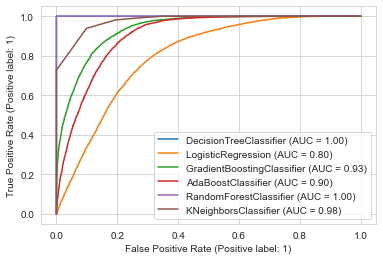

In [84]:
disp=plot_roc_curve(dtc,x_train,y_train)

plot_roc_curve(logreg,x_train,y_train,ax=disp.ax_)

plot_roc_curve(grbc,x_train,y_train,ax=disp.ax_)

plot_roc_curve(adb,x_train,y_train,ax=disp.ax_)

plot_roc_curve(rfc,x_train,y_train,ax=disp.ax_)

plot_roc_curve(knn,x_train,y_train,ax=disp.ax_)

plt.legend(prop={'size':10},loc='lower right')

plt.show()

plotting for testing score for different models:

<Figure size 2160x2160 with 0 Axes>

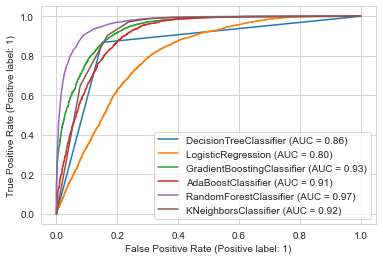

In [87]:
plt.figure(figsize=(30,30))
disp=plot_roc_curve(dtc,x_test,y_test)

plot_roc_curve(logreg,x_test,y_test,ax=disp.ax_)

plot_roc_curve(grbc,x_test,y_test,ax=disp.ax_)

plot_roc_curve(adb,x_test,y_test,ax=disp.ax_)

plot_roc_curve(rfc,x_test,y_test,ax=disp.ax_)

plot_roc_curve(knn,x_test,y_test,ax=disp.ax_)

plt.legend(prop={'size':10},loc='lower right')

plt.show()

# Conclusion: 

# choosing Random Forest Classifier as best model for our dataset as it is giving the best test accuracy. So, this is our final model

# HYPER PARAMETER TUNING:

In [88]:
rfc=RandomForestClassifier()
param_grid={
    'criterion' : ["gini", "entropy"],
    'n_estimators':[200,1000,50],
    'min_samples_split':[2,3,4],
     'random_state':[10]              
}

In [89]:
gridsearch=GridSearchCV(estimator=rfc,param_grid=param_grid,cv=5,n_jobs=-1)

In [90]:
gridsearch.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [200, 1000, 50],
                         'random_state': [10]})

In [91]:
gridsearch.best_params_

{'criterion': 'gini',
 'min_samples_split': 2,
 'n_estimators': 1000,
 'random_state': 10}

In [93]:
rfc=gridsearch.best_estimator_
rfc.fit(x_train,y_train)

RandomForestClassifier(n_estimators=1000, random_state=10)

In [94]:
print(rfc.score(x_train,y_train))
predicted_rfc=rfc.predict(x_test)

0.9999679528265607


In [95]:
rfc_score=cross_val_score(rfc,x_rus,y_rus,cv=5,scoring='accuracy')
print("cross validation score for rfc:",np.mean(rfc_score))

cross validation score for rfc: 0.8940563021014434


In [96]:
rfc.fit(x_train,y_train)
predicted_rfc=rfc.predict(x_test)
print(accuracy_score(y_test,predicted_rfc))
print(confusion_matrix(y_test,predicted_rfc))
print(classification_report(y_test,predicted_rfc))
print("Training accuracy::",rfc.score(x_train,y_train))
print("Test accuracy::",rfc.score(x_test,y_test))

0.9054028071524707
[[4530  672]
 [ 312 4888]]
              precision    recall  f1-score   support

           0       0.94      0.87      0.90      5202
           1       0.88      0.94      0.91      5200

    accuracy                           0.91     10402
   macro avg       0.91      0.91      0.91     10402
weighted avg       0.91      0.91      0.91     10402

Training accuracy:: 0.9999679528265607
Test accuracy:: 0.9054028071524707


Observation: we can see here, there is a slightly increment in our testing score. And this is our successful model

# Report of RandomForestClassifier

In [98]:
print("CLASSIFICATION REPORT::\n",classification_report(y_test,predicted_rfc))

CLASSIFICATION REPORT::
               precision    recall  f1-score   support

           0       0.94      0.87      0.90      5202
           1       0.88      0.94      0.91      5200

    accuracy                           0.91     10402
   macro avg       0.91      0.91      0.91     10402
weighted avg       0.91      0.91      0.91     10402



<AxesSubplot:>

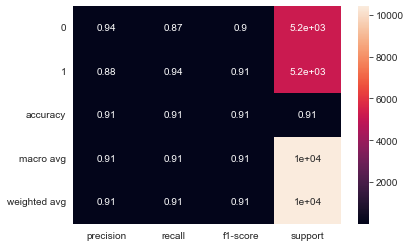

In [99]:
clsf_repo = classification_report(y_test,predicted_rfc,output_dict=True)
sns.heatmap(pd.DataFrame(clsf_repo).T, annot=True)

In [100]:
print("roc auc score::",roc_auc_score(y_test,predicted_rfc))

roc auc score:: 0.9054094579008074


In [101]:
fpr1, tpr1, thresh1 = roc_curve(y_test,predicted_rfc, pos_label=1)

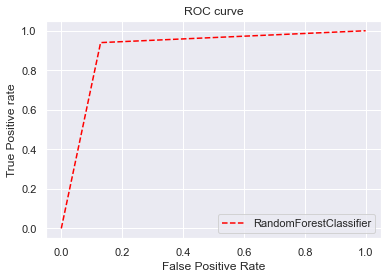

In [102]:
#plotting ROC CURVE
sns.set_theme(style="darkgrid")
plt.plot(fpr1, tpr1, linestyle='--',color='red', label='RandomForestClassifier')

plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')

# Saving Model:

In [104]:
import pickle
filename='census_income_project.pkl'
pickle.dump(rfc,open(filename,'wb'))

# Conclusion:

In [105]:
loaded_model=pickle.load(open('census_income_project.pkl','rb'))
result=loaded_model.score(x_test,y_test)
print(result*100)

90.54028071524706
